In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVFlag
from tqdm.notebook import tqdm
# There's something I learned about Path objects ...
from glob import glob
from pathlib import Path
import os

In [3]:
path = Path('/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/')
JDs = [str(jd) for jd in np.arange(2457548, 2457555)]

In [15]:
flags_all = {}
for JD in JDs:
    print(JD)
    flagfiles = list(np.sort(glob(os.path.join(path,JD,'*.flh5'))))
    flags_all[JD] = UVFlag(flagfiles)

2457548
2457549
2457550
2457551
2457552
2457553
2457554


In [16]:
flags_all['2457548'].lst_array.shape

(4176,)

In [35]:
# Calculate the AND over all days
or_flags = np.zeros_like(flags_all[JD].flag_array.squeeze())
for JD in JDs:
    or_flags = np.logical_or(or_flags, flags_all[JD].flag_array.squeeze())

In [56]:
# Make the flags for the "other" days in the same 
flags_other = {}

for JD in tqdm(JDs):
    JDs_butone = JDs.copy()
    JDs_butone.remove(JD)
    NJDs = len(JDs_butone)
    
    cnts = np.zeros_like(flags_all[JD].flag_array.squeeze(),dtype='int64')
    for other_JD in JDs_butone:
        # Sum up where the flags are True
        cnts += np.array(flags_all[other_JD].flag_array.squeeze(),dtype='int64')
    
    flags_other[JD] = np.logical_or(flags_all[JD].flag_array.squeeze(), cnts > NJDs/2.)

2457548         0.640
2457549         0.633
2457550         0.618
2457551         0.627
2457552         0.638
2457553         0.628
2457554         0.631
ALL             0.414
2457548         0.632
2457549         0.627
2457550         0.610
2457551         0.619
2457552         0.630
2457553         0.622
2457554         0.624


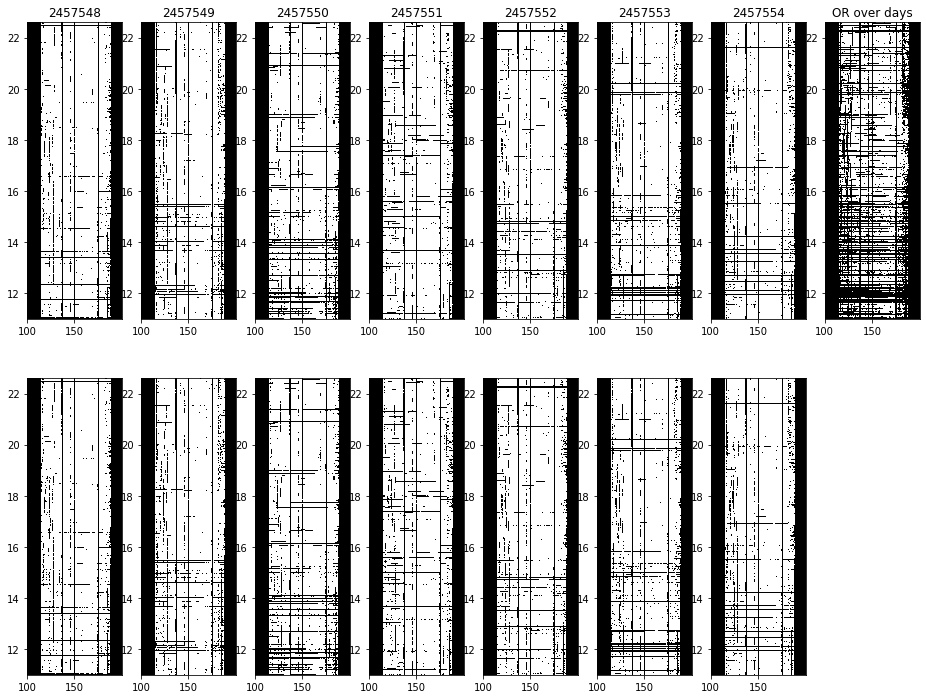

In [69]:
#fig, ax = plt.subplots(nrows=2, ncols=7, 
#                           sharex = 'all', sharey = 'all', 
#                           figsize=(11.5,9)) 

plt.figure(figsize=(16,12))
for ii, JD in enumerate(JDs):
    xx,yy = int(ii/2),ii%2
                       
    flags= ~flags_all[JD].flag_array.squeeze()
    freqs = flags_all[JD].freq_array/1e6
    lsts = flags_all[JD].lst_array*24./(2.*np.pi)
    
    print('{:10s} {:10.3f}'.format(JD, flags.sum()/flags.size))
    
    plt.subplot(2,8,ii+1)
    plt.imshow(flags,aspect='auto', cmap='gray',
               interpolation='none', origin='lower',
               extent=[freqs.min(), freqs.max(), lsts.min(), lsts.max()])
    plt.title(JD)


plt.subplot(2,8,8)
plt.title('OR over days')
plt.imshow(~or_flags,aspect='auto', cmap='gray',
           interpolation='none', origin='lower',
           extent=[freqs.min(), freqs.max(), lsts.min(), lsts.max()])

print('{:10s} {:10.3f}'.format('ALL', (~or_flags).sum()/flags.size))

    #im = ax[xx].imshow(flags,aspect='auto', cmap='gray',
    #                      interpolation='none', origin='lower',
    #                      extent=[freqs.min(), freqs.max(), lsts.min(), lsts.max()])
    
for ii, JD in enumerate(JDs):
    xx,yy = int(ii/2),ii%2
                       
    flags= ~flags_other[JD]
    freqs = flags_all[JD].freq_array/1e6
    lsts = flags_all[JD].lst_array*24./(2.*np.pi)
    
    
    plt.subplot(2,8,ii+1+8)
    plt.imshow(flags,aspect='auto', cmap='gray',
               interpolation='none', origin='lower',
               extent=[freqs.min(), freqs.max(), lsts.min(), lsts.max()])
    #plt.title(JD)

    print('{:10s} {:10.3f}'.format(JD, flags.sum()/flags.size))